## Visualize the simulation design and the resulting data

In [1]:
import itertools
import warnings
import pickle

import pandas as pd
import numpy as np
import torch
from plotnine import *

from isosde.utils import counts_to_ratios

In [2]:
data_dir = '/Users/jysumac/Projects/SPLISOSM_paper/data/simulation_data/'

### Simulated data and parameters for the six general scenarios

In [3]:
df_data_list = []

for gene_variability, iso_usage_variability in itertools.product(
    ['none', 'donut'], ['none', 'mvn', 'donut']
): # loop over all scenarios
    
    # load data and params
    with open(f"{data_dir}/general_six_scenarios/data_gene-{gene_variability}_iso-{iso_usage_variability}.pkl", "rb") as f:
        data = pickle.load(f)
    
    with open(f"{data_dir}/general_six_scenarios/param_gene-{gene_variability}_iso-{iso_usage_variability}.pkl", "rb") as f:
        params = pickle.load(f)
    
    # isoform counts across spots
    df_counts = pd.DataFrame(
        data['counts'][0].numpy(), 
        columns = [f'count_iso{i + 1}' for i in range(3)]
    )
    # isoform observed ratio across spots
    ratios = counts_to_ratios(data['counts'][0], nan_filling = 'none').numpy()
    df_obs_ratios = pd.DataFrame(
        ratios, 
        columns = [f'obs_ratio_iso{i + 1}' for i in range(3)]
    )
    # isoform expected ratio across spots
    df_exp_ratios = pd.DataFrame(
        params['iso_ratio_expected'][0].numpy(), 
        columns = [f'exp_ratio_iso{i + 1}' for i in range(3)]
    )

    # concat all data
    df_data = pd.concat([
        pd.DataFrame(data['coords'], columns = ['x', 'y']),
        pd.DataFrame(data['design_mtx'], columns = [f'covar_{c}' for c in ['C1', 'C2', 'B1', 'B2']]),
        df_counts,
        df_obs_ratios,
        df_exp_ratios
    ], axis = 1)

    # total gene expression
    df_data['total_count'] = data['counts'][0].numpy().sum(1)

    # group labels
    df_data['group_gene'] = gene_variability
    df_data['group_iso'] = iso_usage_variability
    df_data_list.append(df_data)

df_data = pd.concat(df_data_list, axis = 0)

#### Save the source data

In [4]:
import os

res_dir = '/Users/jysumac/Projects/SPLISOSM_paper/results/benchmark/'

if not os.path.exists(f"{res_dir}/figures/source_data/"):
    os.makedirs(f"{res_dir}/figures/source_data/")

df_data.to_csv(f"{res_dir}/figures/source_data/sim_data_general_six.csv", index = False)

#### Visualize total gene expression

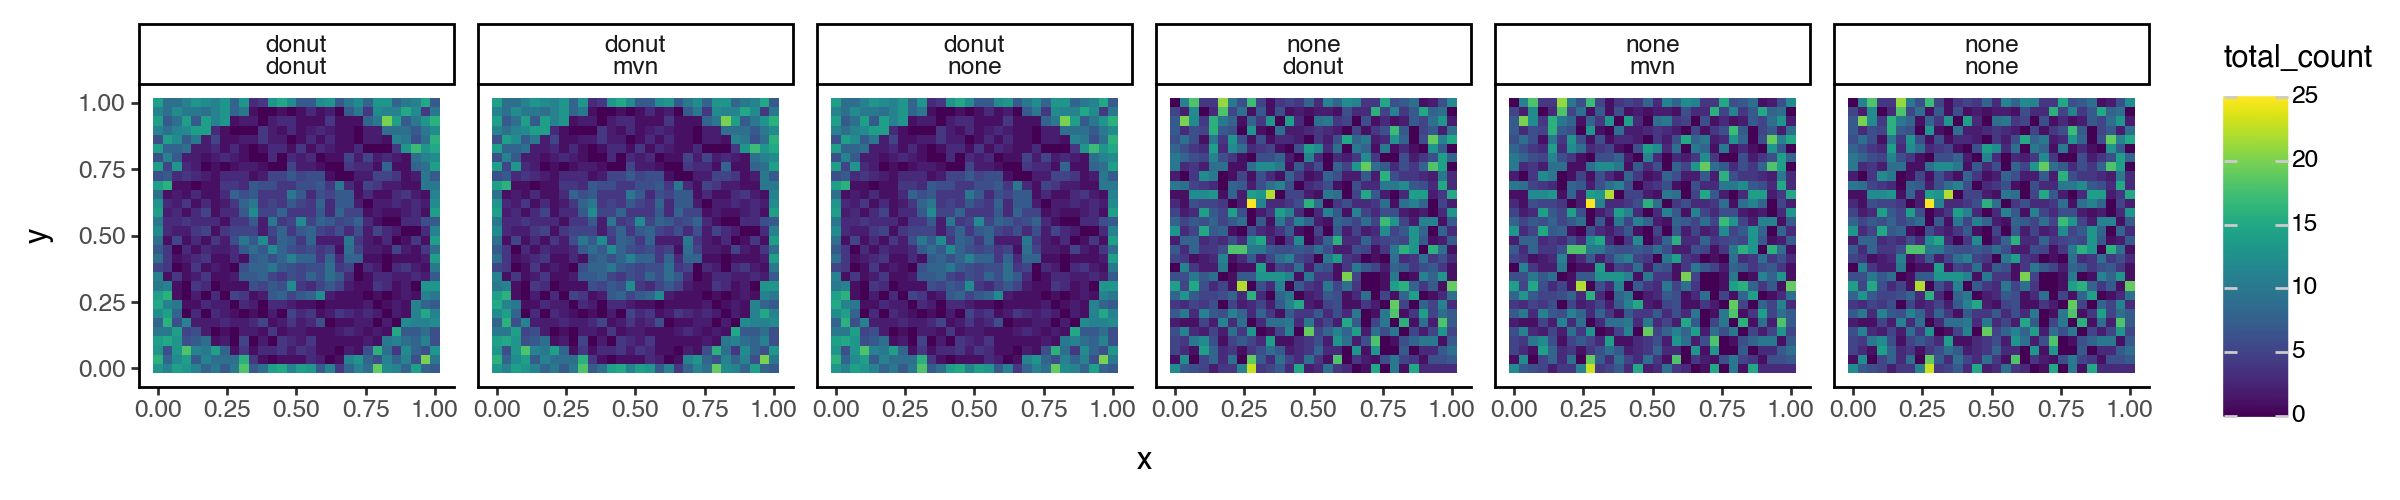

In [5]:
(
    ggplot(df_data, aes(x = 'x', y = 'y', fill = 'total_count')) + 
        facet_wrap('~ group_gene + group_iso', nrow = 1) +
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,2.5])
)

#### Visualize expected isoform ratio

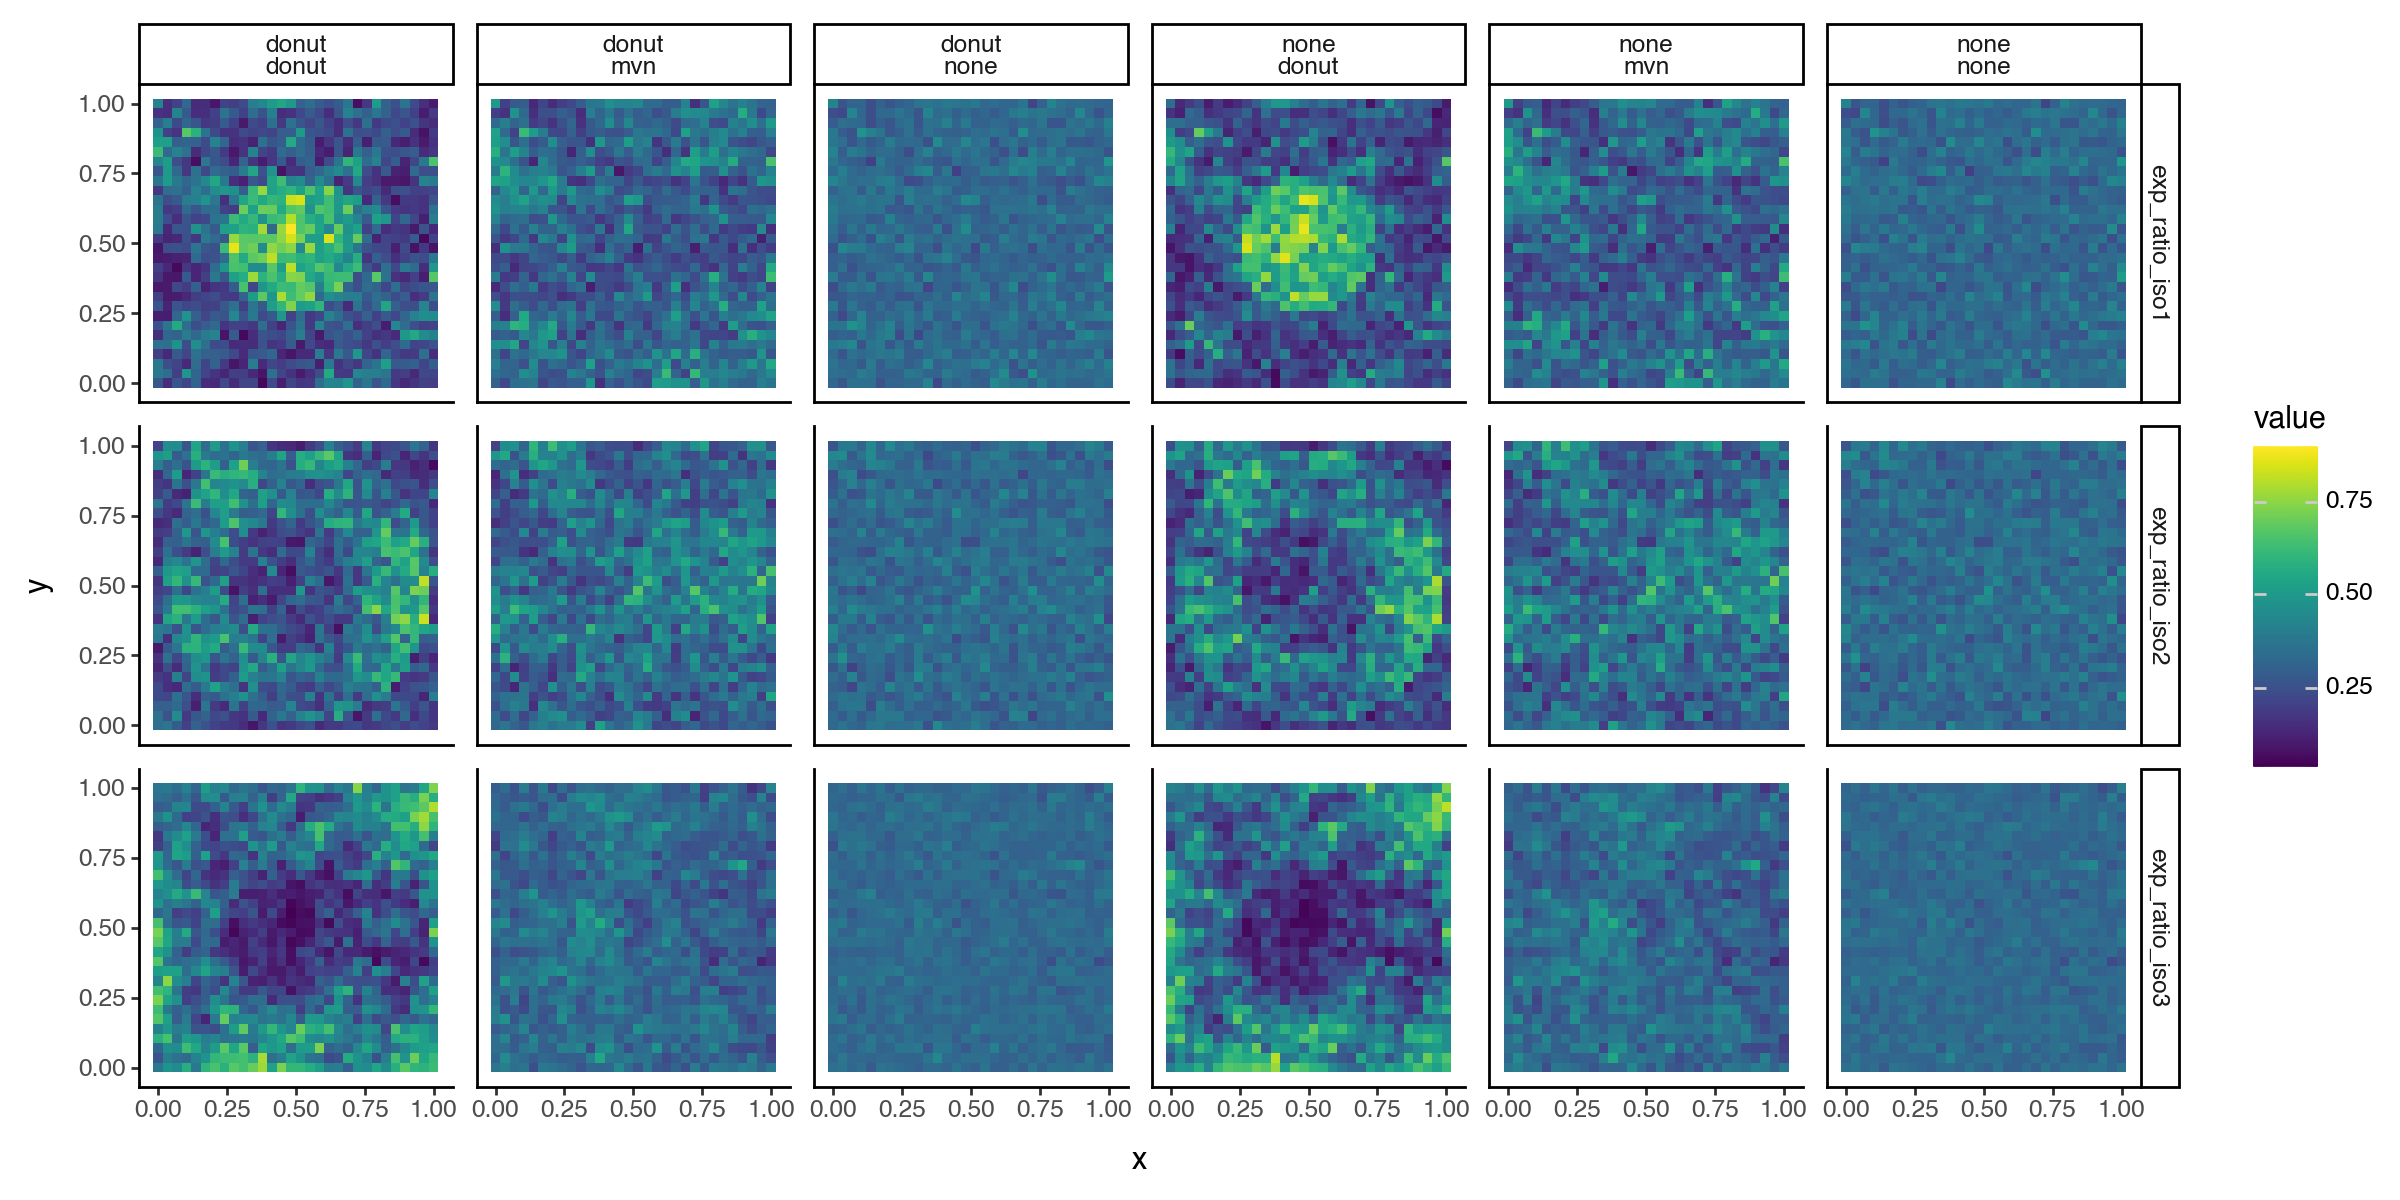

In [6]:
df = df_data.loc[:, ['x', 'y', 'group_gene', 'group_iso'] + [f'exp_ratio_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'group_gene', 'group_iso'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ group_gene + group_iso') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)

#### Visualize covariates

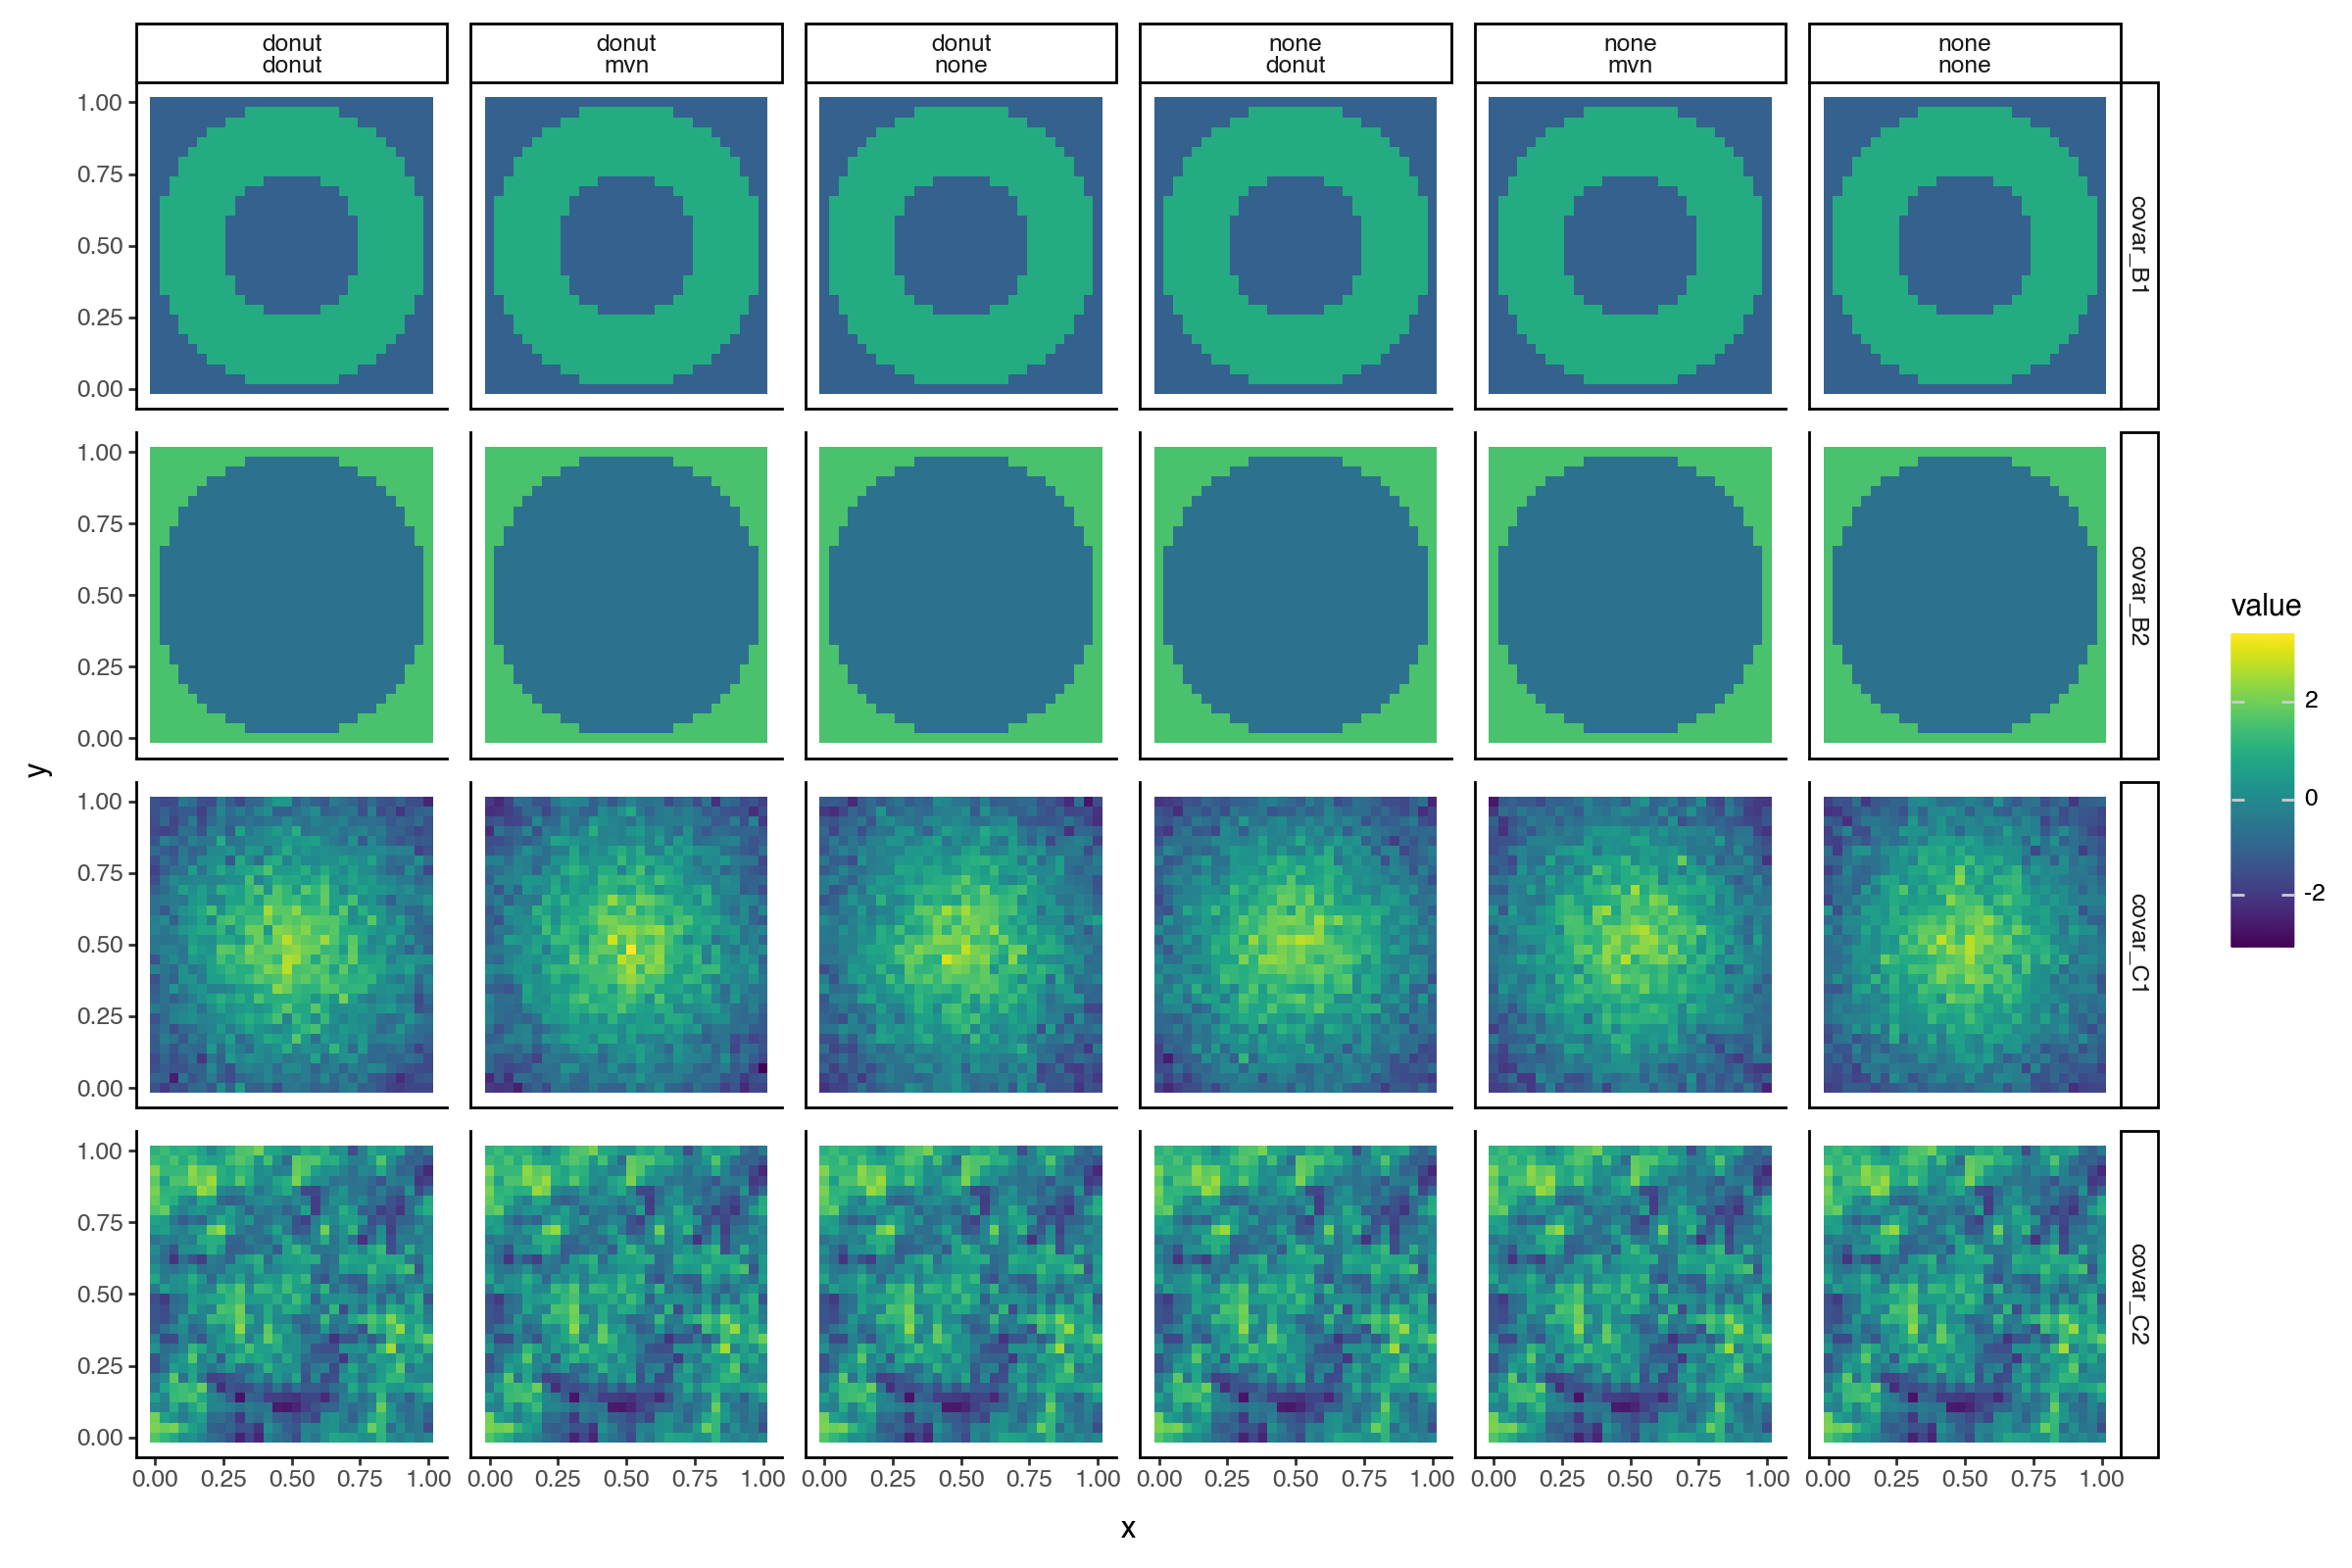

In [7]:
df = df_data.loc[:, ['x', 'y', 'group_gene', 'group_iso'] + [f'covar_{c}' for c in ['C1', 'C2', 'B1', 'B2']]].melt(
    id_vars=['x', 'y', 'group_gene', 'group_iso'], value_name='value', var_name='covariate'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('covariate ~ group_gene + group_iso') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,8])
)

#### Visualize observed counts and ratios

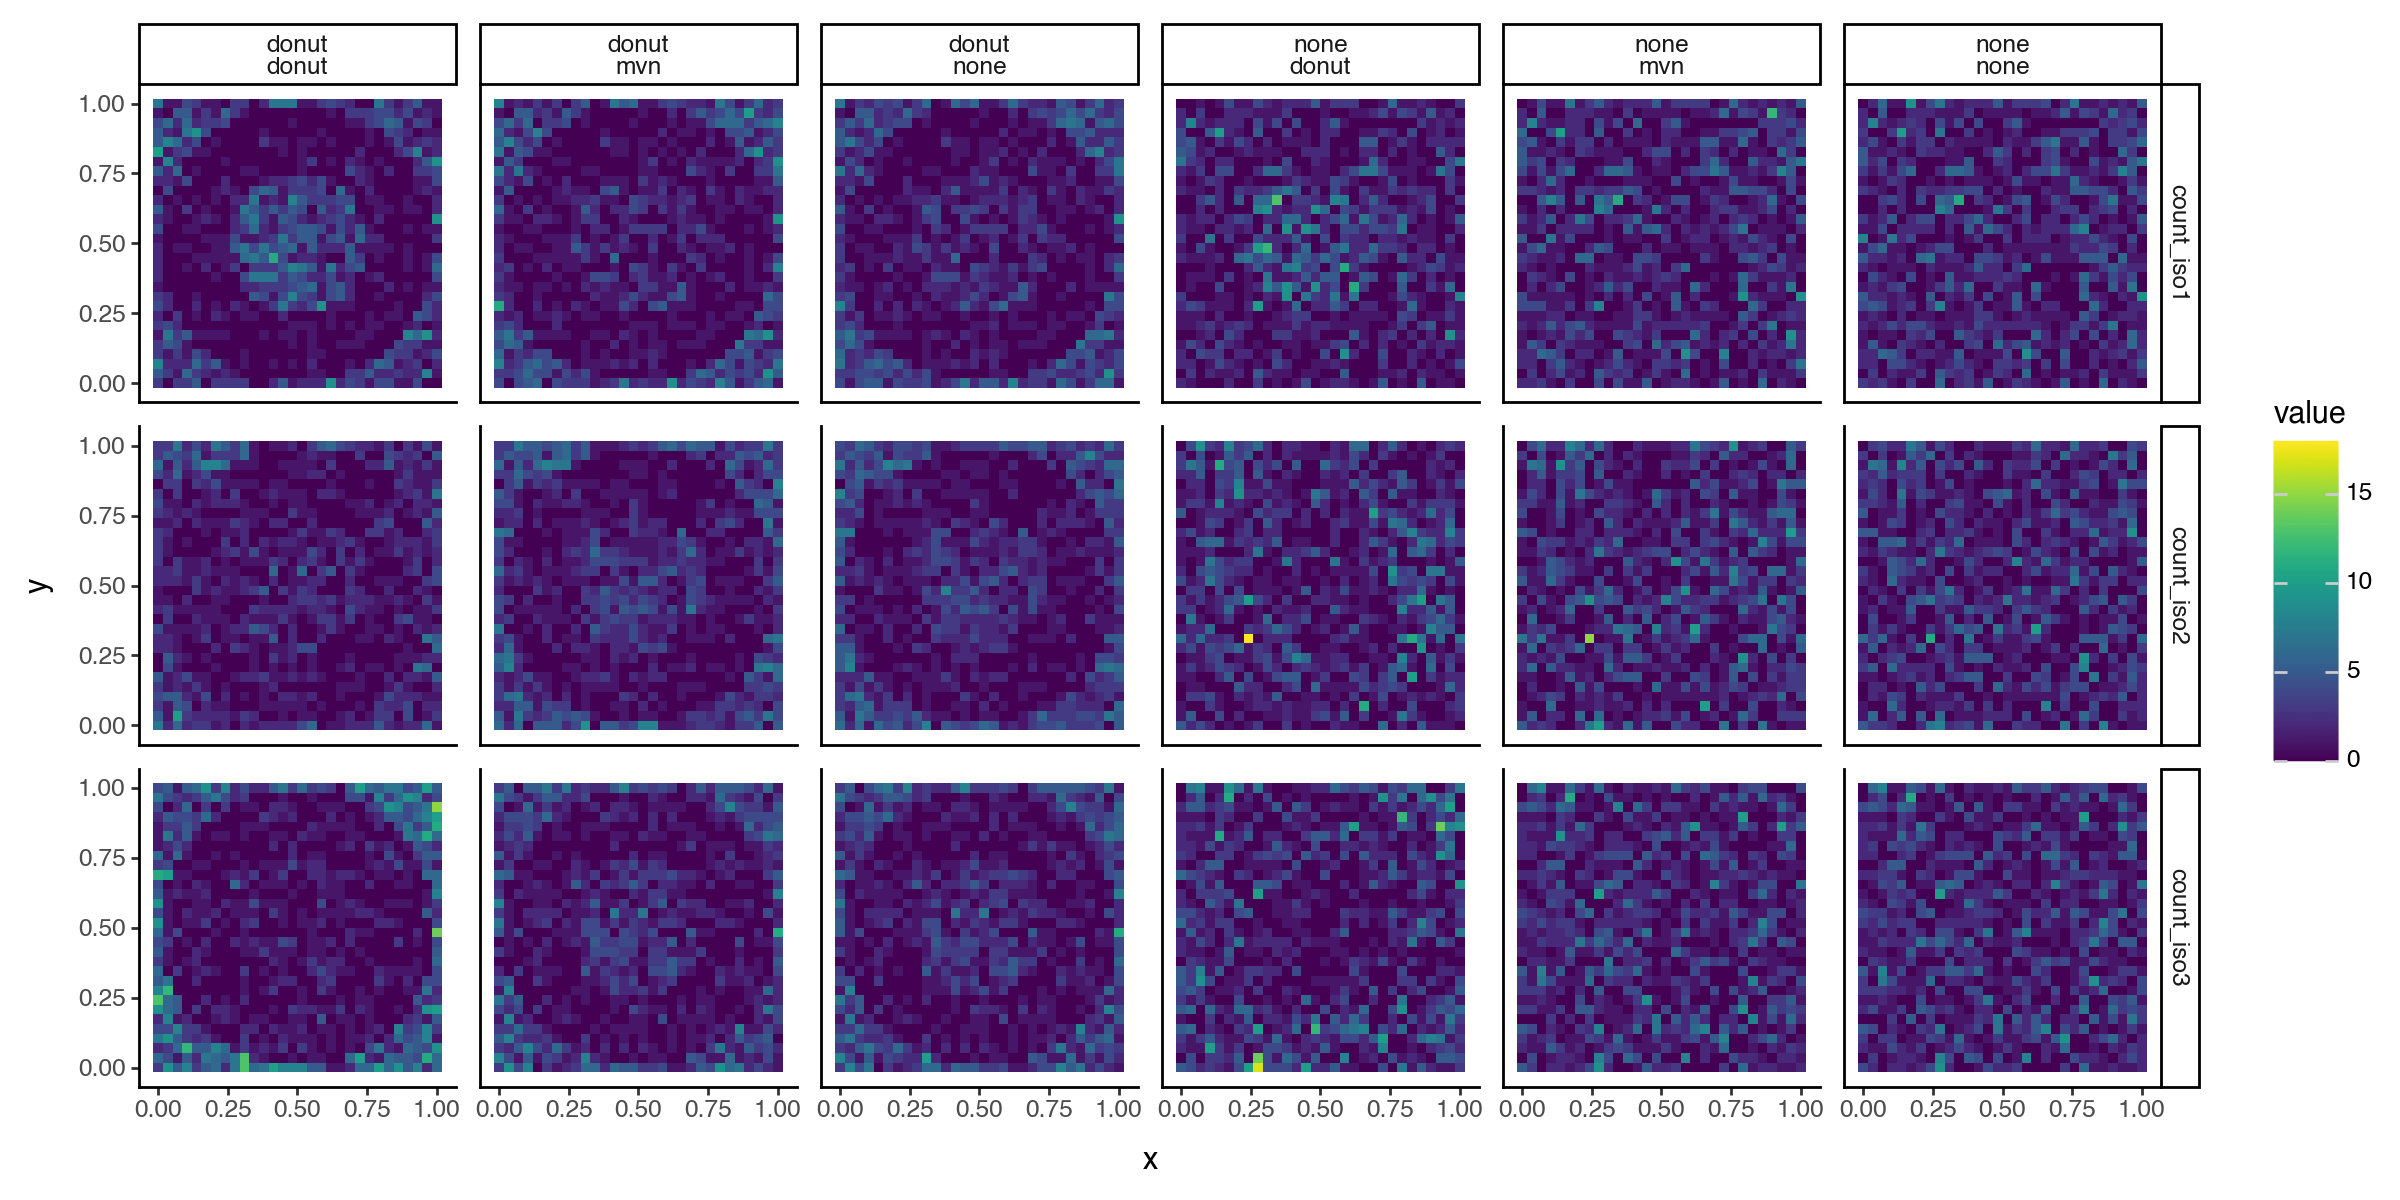

In [8]:
df = df_data.loc[:, ['x', 'y', 'group_gene', 'group_iso'] + [f'count_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'group_gene', 'group_iso'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ group_gene + group_iso') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)

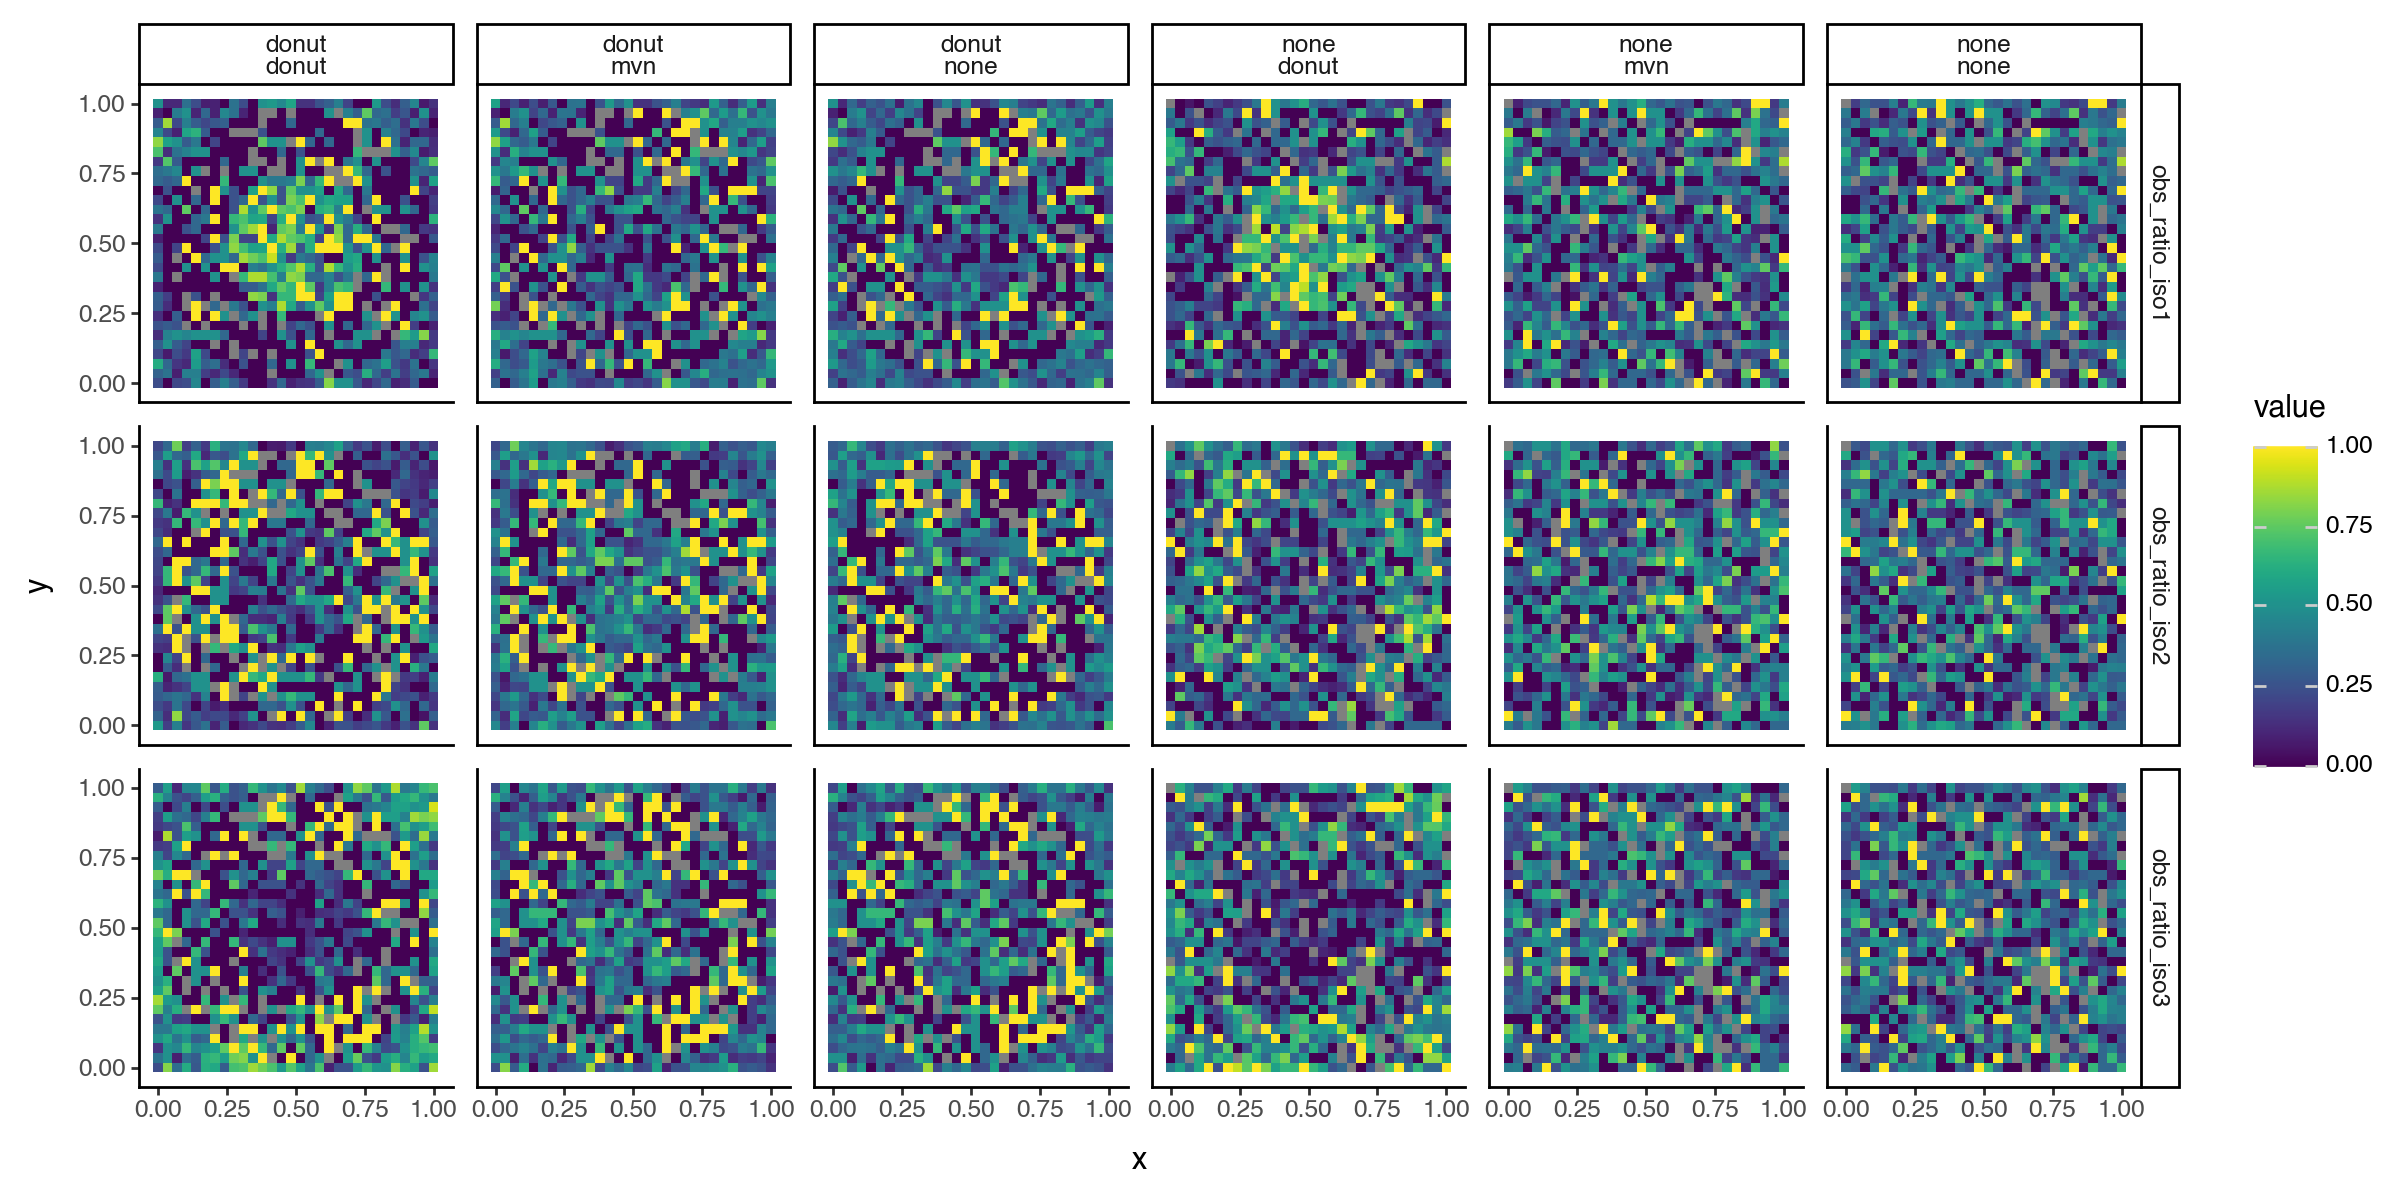

In [9]:
df = df_data.loc[:, ['x', 'y', 'group_gene', 'group_iso'] + [f'obs_ratio_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'group_gene', 'group_iso'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ group_gene + group_iso') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)

### Simulated data and parameters for SV power analysis

In [10]:
df_data_list = []

for prop_var_sp in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:

    # load data and params
    with open(f"{data_dir}/sv_donut_gene/data_prop_var_sp-{prop_var_sp}.pkl", "rb") as f:
        data = pickle.load(f)

    with open(f"{data_dir}/sv_donut_gene/param_prop_var_sp-{prop_var_sp}.pkl", "rb") as f:
        params = pickle.load(f)
    
    # isoform counts across spots
    df_counts = pd.DataFrame(
        data['counts'][0].numpy(), 
        columns = [f'count_iso{i + 1}' for i in range(3)]
    )
    # isoform observed ratio across spots
    ratios = counts_to_ratios(data['counts'][0], nan_filling = 'none').numpy()
    df_obs_ratios = pd.DataFrame(
        ratios, 
        columns = [f'obs_ratio_iso{i + 1}' for i in range(3)]
    )
    # isoform expected ratio across spots
    df_exp_ratios = pd.DataFrame(
        params['iso_ratio_expected'][0].numpy(), 
        columns = [f'exp_ratio_iso{i + 1}' for i in range(3)]
    )

    # concat all data
    df_data = pd.concat([
        pd.DataFrame(data['coords'], columns = ['x', 'y']),
        pd.DataFrame(data['design_mtx'], columns = [f'covar_{c}' for c in ['C1', 'C2', 'B1', 'B2']]),
        df_counts,
        df_obs_ratios,
        df_exp_ratios
    ], axis = 1)

    # total gene expression
    df_data['total_count'] = data['counts'][0].numpy().sum(1)

    # group labels
    df_data['prop_var_sp'] = prop_var_sp
    df_data_list.append(df_data)

df_data = pd.concat(df_data_list, axis = 0)

#### Save the source data

In [11]:
import os

res_dir = '/Users/jysumac/Projects/SPLISOSM_paper/results/benchmark/'

if not os.path.exists(f"{res_dir}/figures/source_data/"):
    os.makedirs(f"{res_dir}/figures/source_data/")

df_data.to_csv(f"{res_dir}/figures/source_data/sim_data_sv_power.csv", index = False)

#### Visualize expected isoform ratio

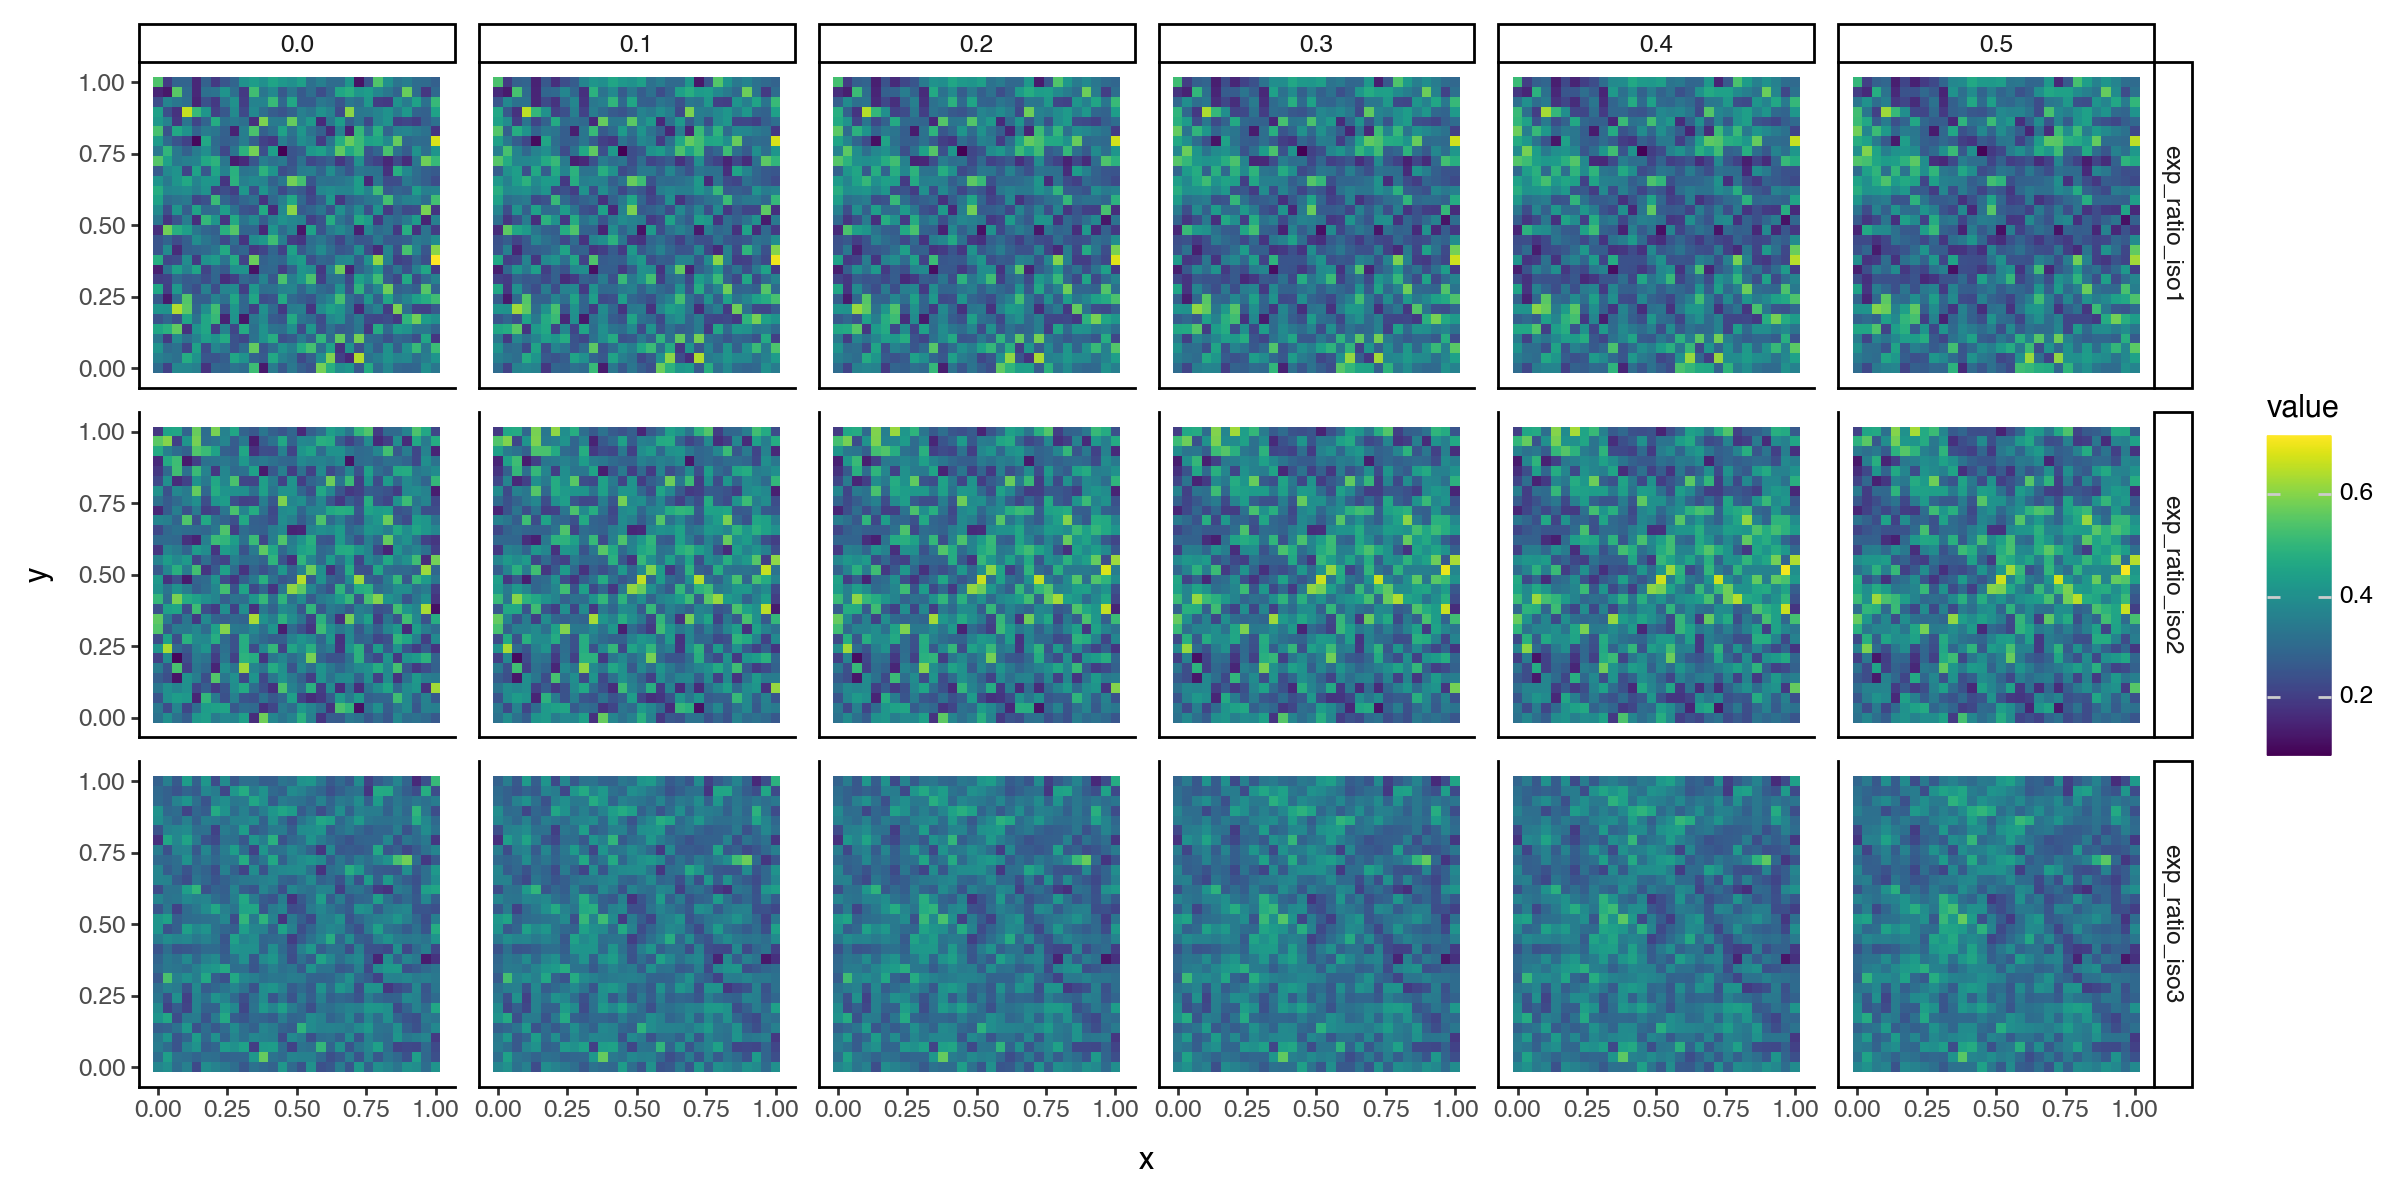

In [12]:
df = df_data.loc[:, ['x', 'y', 'prop_var_sp'] + [f'exp_ratio_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'prop_var_sp'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ prop_var_sp') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)

#### Visualize observed counts and ratios

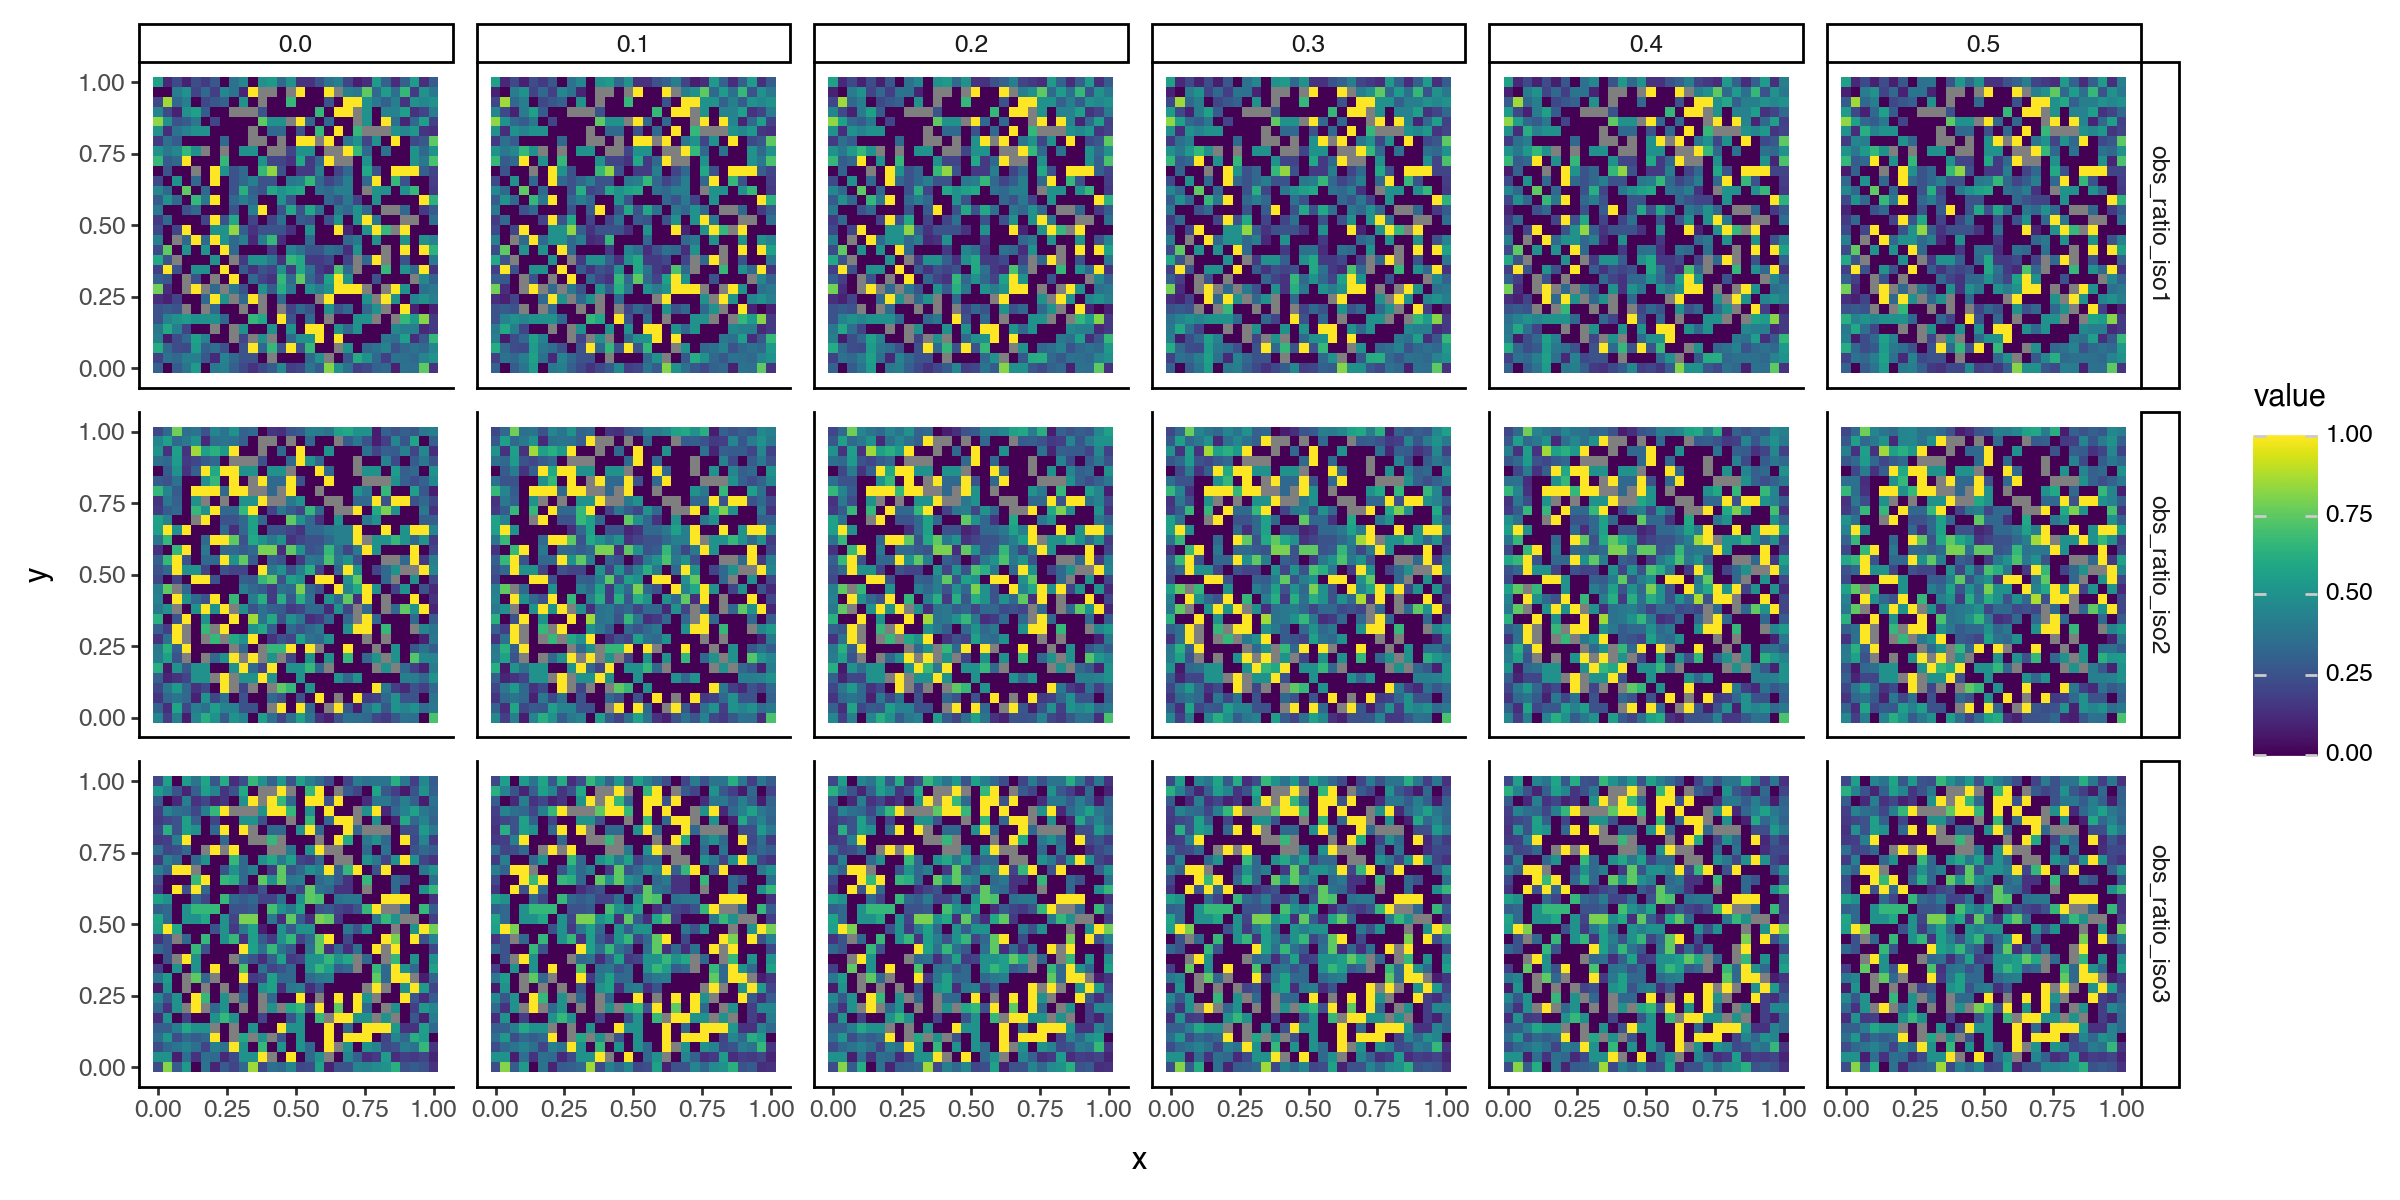

In [13]:
df = df_data.loc[:, ['x', 'y', 'prop_var_sp'] + [f'obs_ratio_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'prop_var_sp'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ prop_var_sp') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)

### Simulated data and parameters for DU power analysis

In [14]:
df_data_list = []

for beta_scale in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    
    # load data and params
    with open(f"{data_dir}/du_donut_gene/data_beta-{beta_scale}.pkl", "rb") as f:
        data = pickle.load(f)

    with open(f"{data_dir}/du_donut_gene/param_beta-{beta_scale}.pkl", "rb") as f:
        params = pickle.load(f)
    
    # isoform counts across spots
    df_counts = pd.DataFrame(
        data['counts'][0].numpy(), 
        columns = [f'count_iso{i + 1}' for i in range(3)]
    )
    # isoform observed ratio across spots
    ratios = counts_to_ratios(data['counts'][0], nan_filling = 'none').numpy()
    df_obs_ratios = pd.DataFrame(
        ratios, 
        columns = [f'obs_ratio_iso{i + 1}' for i in range(3)]
    )
    # isoform expected ratio across spots
    df_exp_ratios = pd.DataFrame(
        params['iso_ratio_expected'][0].numpy(), 
        columns = [f'exp_ratio_iso{i + 1}' for i in range(3)]
    )

    # concat all data
    df_data = pd.concat([
        pd.DataFrame(data['coords'], columns = ['x', 'y']),
        pd.DataFrame(data['design_mtx'], columns = [f'covar_{c}' for c in ['C1', 'C2', 'B1', 'B2']]),
        df_counts,
        df_obs_ratios,
        df_exp_ratios
    ], axis = 1)

    # total gene expression
    df_data['total_count'] = data['counts'][0].numpy().sum(1)

    # group labels
    df_data['beta_scale'] = beta_scale
    df_data_list.append(df_data)

df_data = pd.concat(df_data_list, axis = 0)

#### Save the source data

In [17]:
import os

res_dir = '/Users/jysumac/Projects/SPLISOSM_paper/results/benchmark/'

if not os.path.exists(f"{res_dir}/figures/source_data/"):
    os.makedirs(f"{res_dir}/figures/source_data/")

df_data.to_csv(f"{res_dir}/figures/source_data/sim_data_du_power.csv", index = False)

#### Visualize expected isoform ratio

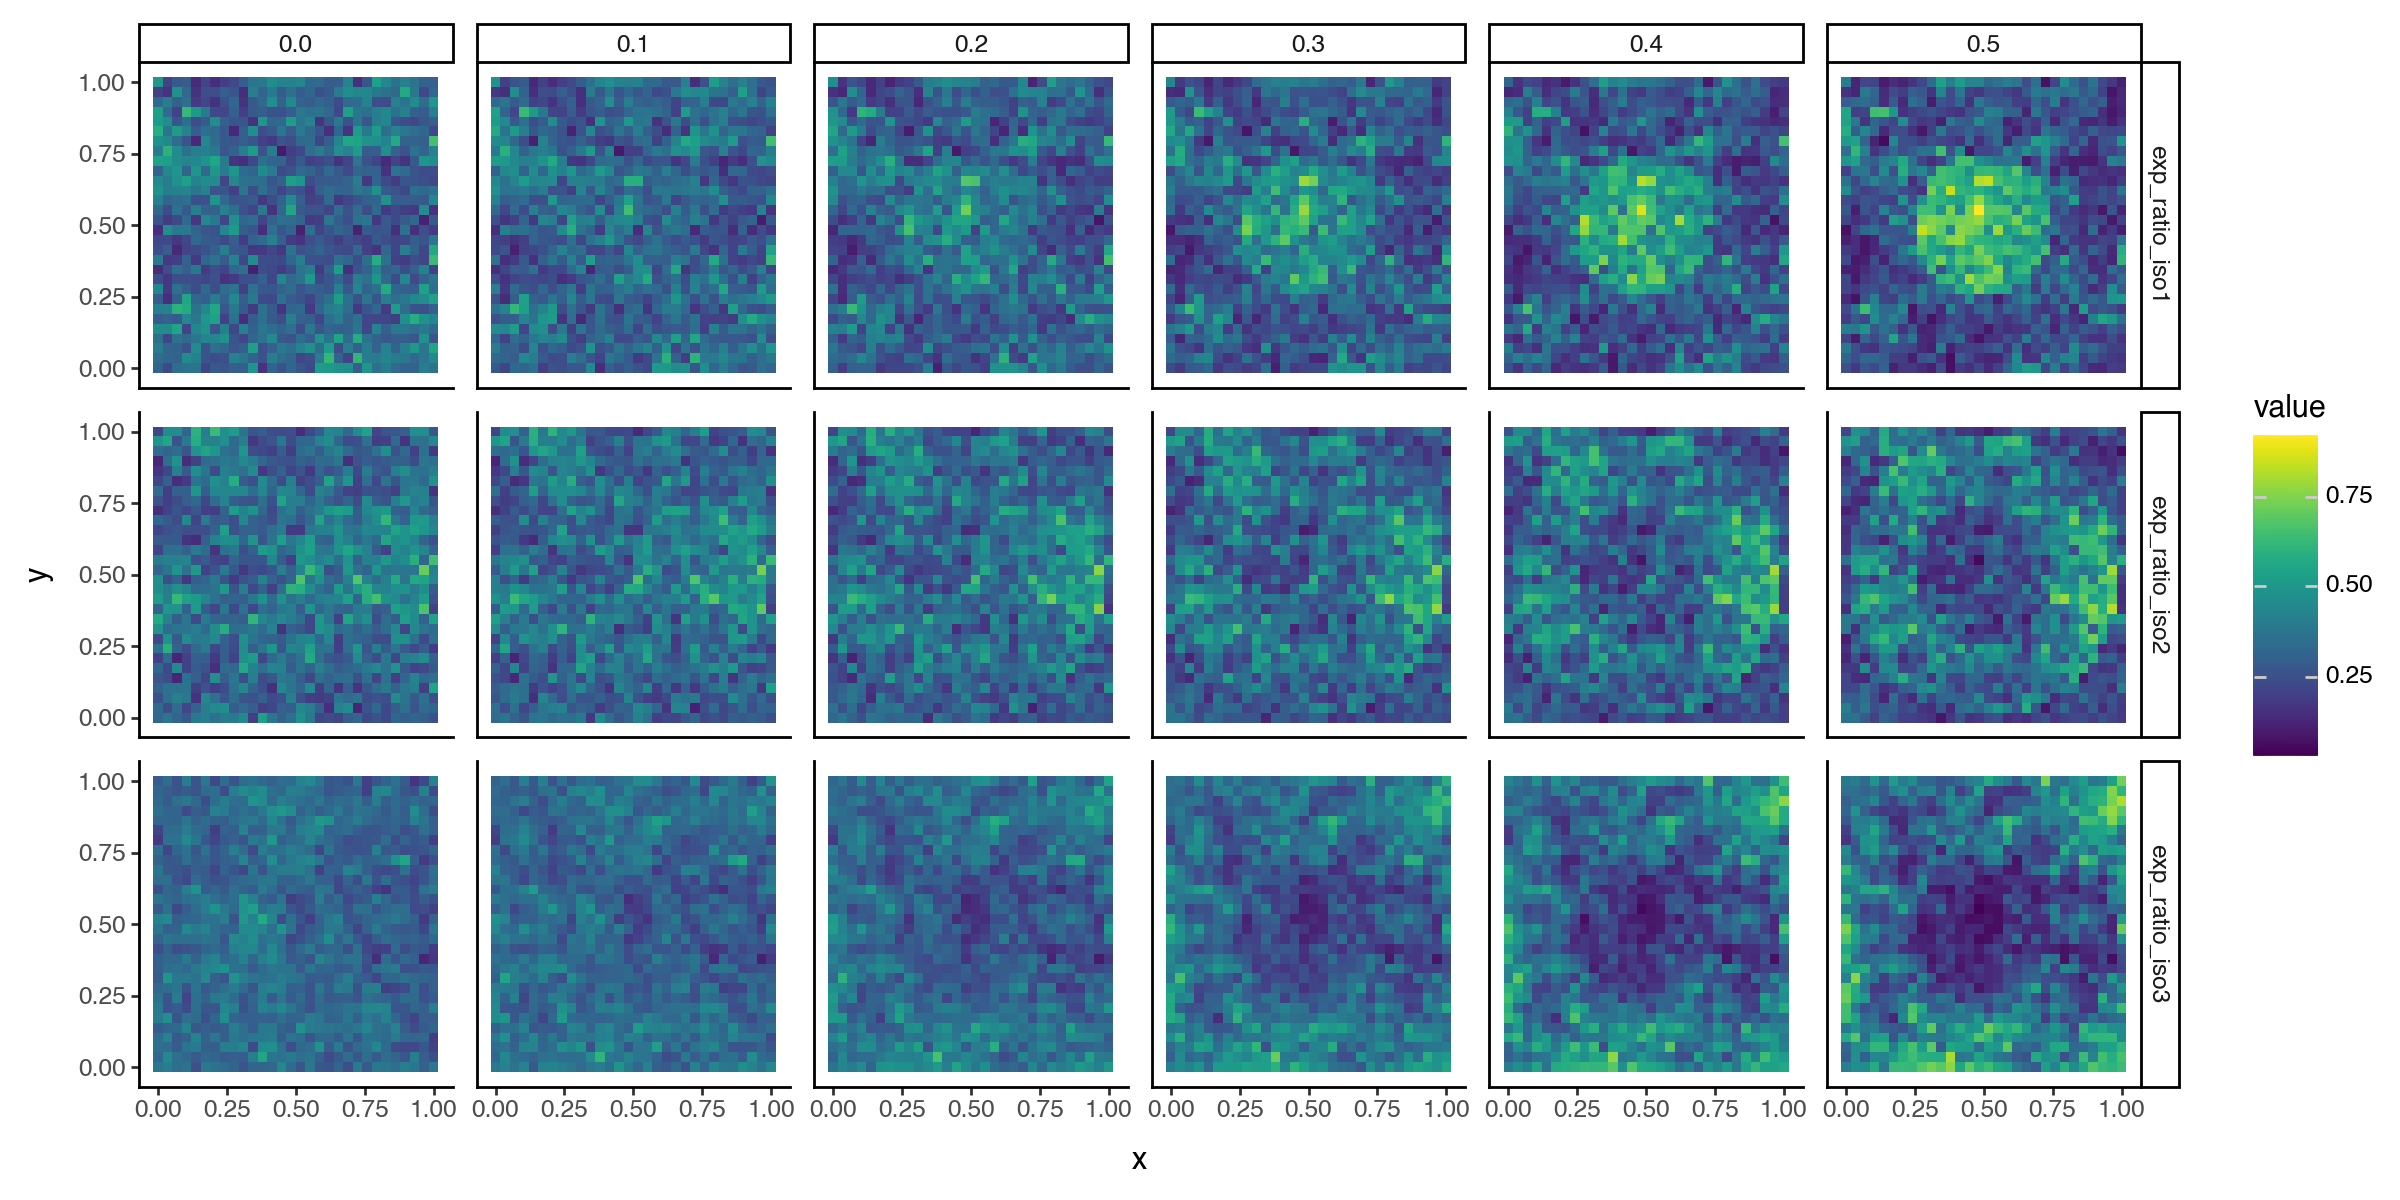

In [15]:
df = df_data.loc[:, ['x', 'y', 'beta_scale'] + [f'exp_ratio_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'beta_scale'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ beta_scale') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)

#### Visualize observed counts and ratios

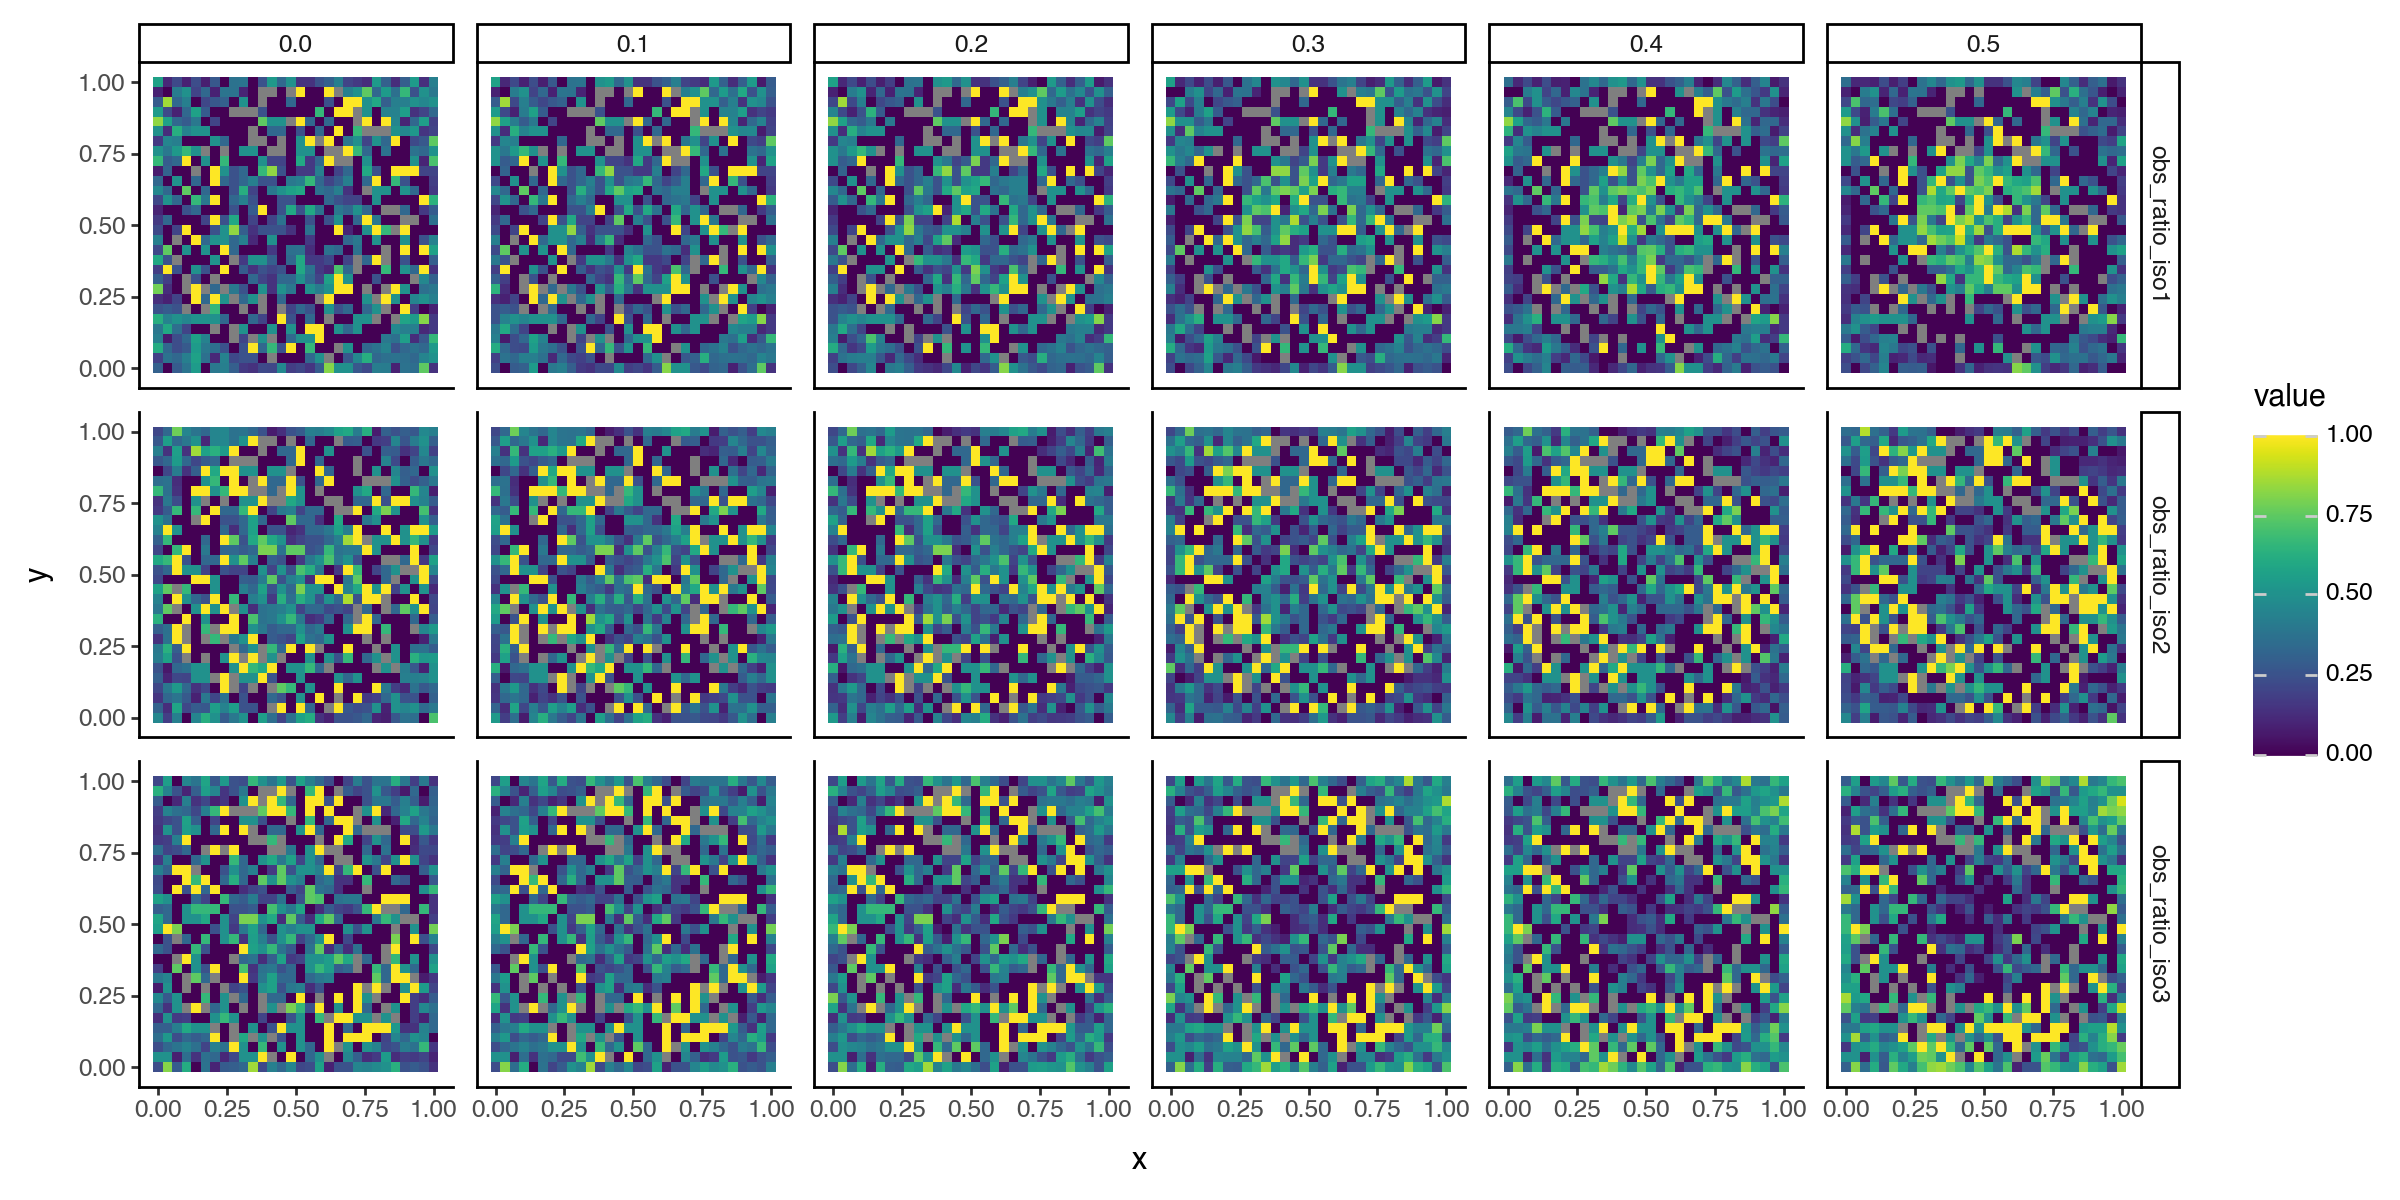

In [16]:
df = df_data.loc[:, ['x', 'y', 'beta_scale'] + [f'obs_ratio_iso{i + 1}' for i in range(3)]].melt(
    id_vars=['x', 'y', 'beta_scale'], value_name='value', var_name='isoform'
)
(
    ggplot(df, aes(x = 'x', y = 'y', fill = 'value')) +
        facet_grid('isoform ~ beta_scale') + 
        geom_tile() + 
        theme_classic() + 
        theme(figure_size=[12,6])
)